In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# PCA

In [14]:
# Load the neural data
neural_data_dir = beh_data_dir = "COBAR_neural.pkl"
neural_df = pd.read_pickle(neural_data_dir)

# Get the number of trials
nb_trials = len(np.unique(neural_df.index.get_level_values("Trial")))

# Get the time 
t = neural_df["t"][neural_df.index.get_level_values("Trial") == 0]

# Create the dataset for trial 0
F = neural_df.filter(regex = "neuron")[neural_df.index.get_level_values("Trial") == 0]

# Convert into a numpy array
F = F.to_numpy()

# Sort the intensities
F_sorted = np.sort(F, axis=0)

# Calculate the baseline intensity
q10_index = int(0.1*F_sorted.shape[0])
F0 = np.mean(F_sorted[:q10_index], axis=0)

# Calculate flurescence changes and filter
deltaF_over_F = (F-F0)/F0*100

# Filter the signal
deltaF_over_F_filtered = signal.medfilt(deltaF_over_F)

#PCA decomposition
PCA_object = PCA(n_components=4)
deltaF_over_F_proj = PCA_object.fit_transform(deltaF_over_F_filtered)
sum(PCA_object.explained_variance_ratio_)

0.905171816682816

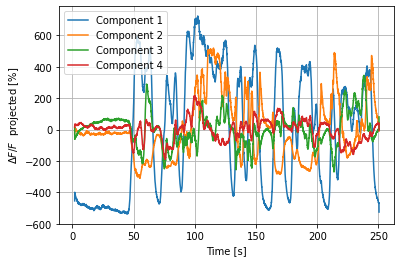

In [15]:
# Plot the first principal components over time
legend_labels = []
plt.figure()
for i in range(deltaF_over_F_proj.shape[1]):
    plt.plot(t, deltaF_over_F_proj[:,i])
    legend_labels.append("Component " + str(i+1))

plt.xlabel("Time [s]")
plt.ylabel("$\Delta F/F$  projected [%]")
plt.grid()
plt.legend(legend_labels)
plt.show()

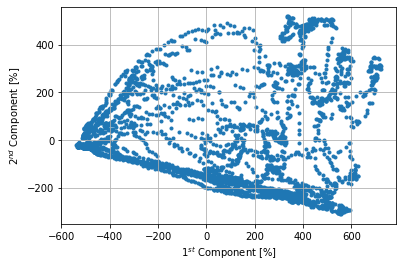

In [16]:
# Scatter the first 2 components
plt.figure()
plt.scatter(deltaF_over_F_proj[:,0], deltaF_over_F_proj[:,1], marker='.')
plt.xlabel("$1^{st}$ Component [%]")
plt.ylabel("$2^{nd}$ Component [%]")
plt.grid()
plt.show()

# t-SNE

In [21]:
#tsne decomposition
deltaF_over_F_proj_tsne = TSNE(n_components = 2).fit_transform(deltaF_over_F_filtered)

(4040, 2)

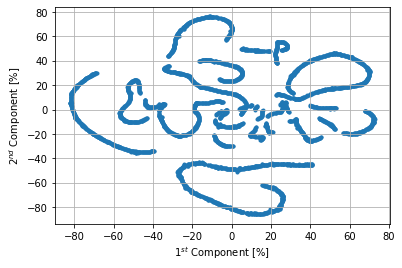

In [22]:
# Scatter the first 2 components
plt.figure()
plt.scatter(deltaF_over_F_proj_tsne[:,0], deltaF_over_F_proj_tsne[:,1], marker='.')
plt.xlabel("$1^{st}$ Component")
plt.ylabel("$2^{nd}$ Component")
plt.grid()
plt.show()

# u-MAP

In [24]:
deltaF_over_F_proj_umap =umap.UMAP().fit_transform(deltaF_over_F_filtered)

In [25]:
deltaF_over_F_proj_umap.shape

(4040, 2)

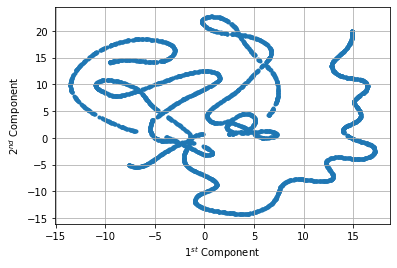

In [26]:
# Scatter the first 2 components
plt.figure()
plt.scatter(deltaF_over_F_proj_umap[:,0], deltaF_over_F_proj_umap[:,1], marker='.')
plt.xlabel("$1^{st}$ Component")
plt.ylabel("$2^{nd}$ Component")
plt.grid()
plt.show()

In [27]:
deltaF_over_F_filtered.shape

(4040, 123)